## SVM и PCA
Пензин М.С.

penzin.ml.tsu@gmail.com

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9

## Метод опорных векторов

__[Support Vector Machine](https://svmtutorial.online/download.php?file=SVM_tutorial.pdf)__ - алгоритм обучения с учителем в семействе линейных моделей.

Пусть есть набор признаков $\mathrm{X}$ с метками класса $y_n \in \{-1, +1\}$.

## Логистическая регрессия

Классификатор можно представить в виде:

$$
f(\vec{x}) = \mathrm{sign} \left (
    \vec{\omega}^T \vec{x} + \omega_0
\right)
=
\mathrm{sign} \left (
    \langle \vec{\omega}, \vec{x} \rangle + \omega_0
\right)
$$

Здесь $\vec{\omega} = (\omega_1, \ldots, \omega_K)$ и $\vec{x} = (x_1, \ldots, x_K)$.

$$
    \langle \vec{\omega}, \vec{x} \rangle = -\omega_0
$$

Фактически это выражение определяет гиперплоскость, разделяющую объекты на два класса. Если класс лежит с одной стороны плоскости - это (+1), со другой стороны - (-1). 

Выражение $\langle \vec{\omega}, \vec{x} \rangle$ фактически проецирует вектор признаков на нормаль нашей разделяющей плоскости, знак этой проекции с учетом сдвига $\omega_0$ дает классификатору возможность определить класс, а ее величина будет отображать степень уверенности в данном классе, ведь чем дальше от разделяющей поверхности, тем меньше возможности ошибиться.

Допустим у нас есть набор данных, которые мы должны разнести по классам.

In [2]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(centers=[[-3, -3], [3, 3]], random_state=13)

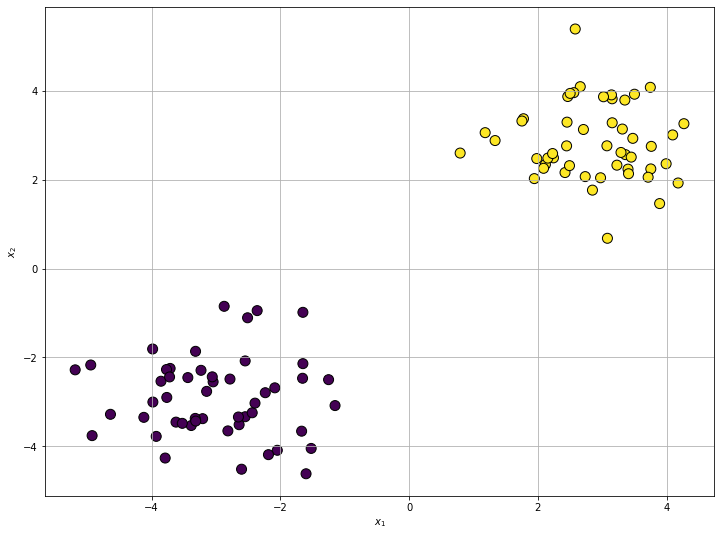

In [3]:
plt.scatter(X[:,0], X[:,1], c=Y, edgecolor="k", s=100);
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()
plt.show()

Очевидно, что данные идеально разделяются в признаковом пространстве.

In [4]:
def plot(X, Y, angle=135, b=0):
    plt.scatter(X[:,0], X[:,1], c=Y);
    x = np.linspace(-6, 6, 100)
    plt.ylim((-5, 5))
    plt.xlim((-5, 5))
    plt.plot(x, np.tan(angle/180 * np.pi) * x + b)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid()
    plt.show()

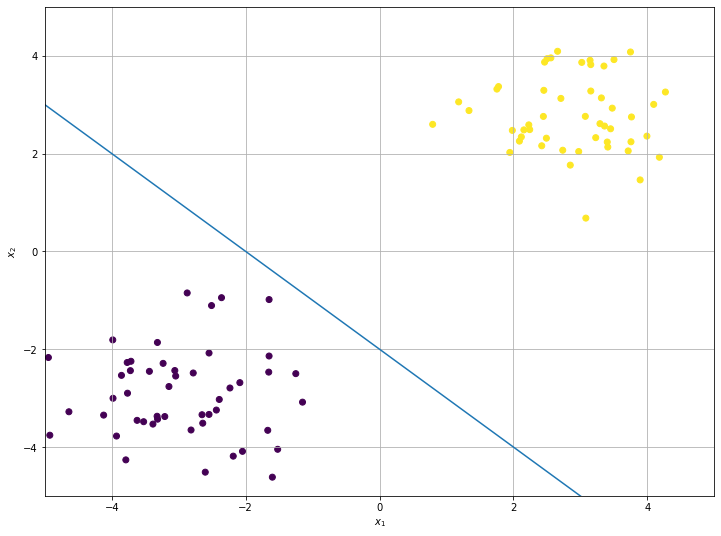

In [5]:
plot(X, Y, 135, -2)

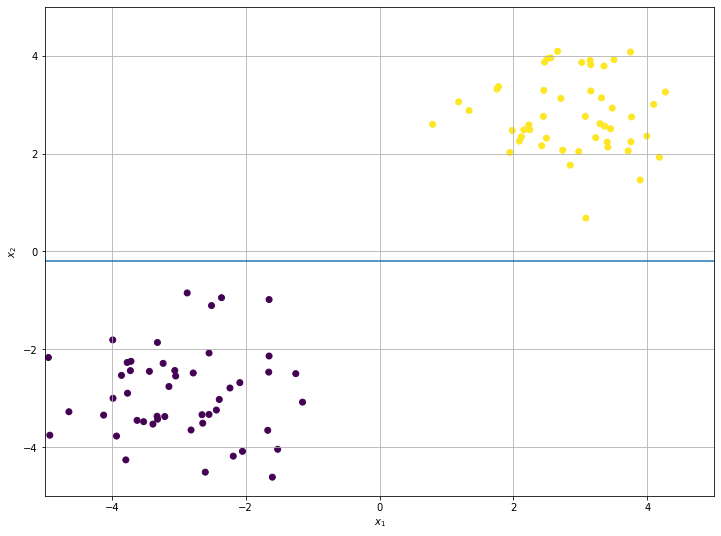

In [6]:
plot(X, Y, 0, -0.2)

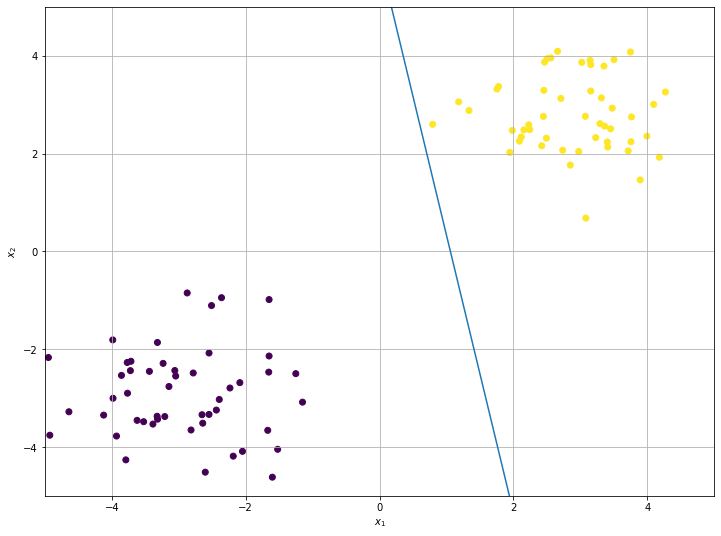

In [7]:
plot(X, Y, 100, 6)

А можно ли найти наилучшее положение разделяющей гиперплоскости?

## Зазор

Логичным предположением является, максимизация **зазора**, т.е. расстояния между классами, что будет способствовать более уверенной классификации. Разделяющая гиперплоскость будет просто находится в середине зазора.

Заметим, что мы можем определить $\vec{\omega}$  и  $\omega_0$  с точностью до нормировки, т.е. если мы их умножим на одну и ту же положительную константу, то результат классификации останется тем же.

Выберем такую нормировку, чтобы для всех объектов на краях зазора выполнялось условие

$$
\langle \vec{\omega}, \vec{x}_m \rangle + \omega_0 = y_m
$$

таким образом для всех объектов будет иметь место

$$
\langle \vec{\omega}, \vec{x}_n \rangle + \omega_0 = \left\{\begin{eqnarray}
&\le -1, &\text{ если } y_n = -1 \\
&\ge +1, &\text{ если } y_n = +1
\end{eqnarray}\right.
$$

В общем виде

$$
y_n \left(\langle \vec{\omega}, \vec{x}_n \rangle + \omega_0 \right) \ge 1
$$

А следующее условие, задаёт полосу разделяющую классы

$$
-1 < \langle \vec{\omega}, \vec{x} \rangle < +1
$$

Для того, чтобы зазор был максимальным, расстояние между граничными гиперплоскостями должно быть максимально. Пусть у нас есть два произвольных объекта $\vec{x}_-$ и $\vec{x}_+$ для классов $-1$ и $+1$, соответствено, лежащие на границах разделяющей полосы. Тогда ширина ищется довольно просто

$$
\left\langle
\vec{x}_+ - \vec{x}_-, 
\frac{
    \vec{\omega}
}{
    \|\vec{\omega}\|
}
\right\rangle
=
\frac{
    \langle \vec{\omega}, \vec{x}_+ \rangle
    -
    \langle \vec{\omega}, \vec{x}_- \rangle
}{
    \|\vec{\omega}\|
}
=
\\
=
\frac{
    (-\omega_0 + 1)
    -
    (-\omega_0 -1)
}{
    \|\vec{\omega}\|
}
=
\frac{2}{
    \|\vec{\omega}\|
}
$$

$$
\frac{2}{
    \|\vec{\omega}\|
}
$$

Таким образом, ширина полосы максимальна, когда норма вектора $\vec{\omega}$ минимальна.

<center>
    <img src="SVM_margins.svg" style="max-height: 500px; background:white">
</center>


## Линейно разделимый случай

В случае полной линейной разделимости, мы можем свести нашу задачу к минимизации квадратичной формы при $N$ ограничениях

$$
\left\{
\begin{align}
&\|\vec{\omega}\|^2 \to \min \\
&y_n \left(\langle \vec{\omega}, \vec{x}_n \rangle + \omega_0 \right) \ge 1, \text{ где } 1 \le n \le N
\end{align}
\right.
$$

По теореме __[Куна-Таккера](http://www.machinelearning.ru/wiki/images/b/ba/MO17_seminar8.pdf)__, эта задача эквивалентна двойственной задачи поиска седловой точки функции Лагранжа

$$
\left\{
\begin{align}
    & L(\vec{\omega}, \omega_0, \vec{\lambda})
    =
    \frac{1}{2} \| \vec{\omega} \|^2
    -
    \sum_{n=1}^N \lambda_n \left(
        y_n \left(
            \langle \vec{\omega}, \vec{x}_n \rangle + \omega_0 
        \right) - 1
    \right)
    \to \min_{\vec{\omega}, \omega_0} \max_{\vec{\lambda}} 
    \\
    &\lambda_n \ge 0, \text{ где } 1 \le n \le N
\end{align}
\right.
$$

При этом в точке минимума $\vec{\omega}^*$ должно выполнятся условие дополняющей нежесткости

$$
\lambda_n^* \left(
        y_n \left(
            \langle \vec{\omega}^*, \vec{x}_n \rangle + \omega_0^*
        \right) - 1
    \right) = 0
$$

оно оставляет лишь только те $\lambda$, где выполняется условие $\langle \vec{\omega}^*, \vec{x}_n \rangle + \omega_0^* = y_n$, для остальных случаев $\lambda = 0$

Далее, нам нужно приравнять к нулю первые производные Лагранжиана

$$
\begin{align}
&\frac{\partial L}{\partial \vec{\omega}} = \vec{\omega} - \sum_{n=1}^N \lambda_n y_n \vec{x}_n \qquad
&\Rightarrow \qquad
&\vec{\omega} = \sum_{n=1}^N \lambda_n y_n \vec{x}_n 
\\
&\frac{\partial L}{\partial \omega_0} = -\sum_{n=1}^N \lambda_n y_n
&\Rightarrow \qquad
&\sum_{n=1}^N \lambda_n y_n = 0
\end{align}
$$

Подставим их в Лагранжиан

$$
\left\{
\begin{align}
    &
    L(\vec{\lambda})
    =
    -\frac{1}{2} \sum_{n=1}^N \sum_{k=1}^N \lambda_n \lambda_k y_n y_k
    \langle \vec{x}_n, \vec{x}_k \rangle
    +
    \sum_{n=1}^N \lambda_n 
    \to \max_{\vec{\lambda}} 
    \\
    &\lambda_n \ge 0, \text{ где } 1 \le n \le N
    \\
    &\sum_{n=1}^N \lambda_n y_n = 0
\end{align}
\right.
$$

Или если домножить на минус

$$
\left\{
\begin{align}
    &
    -L(\vec{\lambda})
    =
    \frac{1}{2} \sum_{n=1}^N \sum_{k=1}^N \lambda_n \lambda_k y_n y_k
    \langle \vec{x}_n, \vec{x}_k \rangle
    -
    \sum_{n=1}^N \lambda_n 
    \to \min_{\vec{\lambda}} 
    \\
    &\lambda_n \ge 0, \text{ где } 1 \le n \le N
    \\
    &\sum_{n=1}^N \lambda_n y_n = 0
\end{align}
\right.
$$

Допустим мы решили задачу и получили набор $\vec{\lambda}$, тогда мы легко можем найти $\vec{\omega}$

$$
\vec{\omega} = \sum_{n=1}^N \lambda_n y_n \vec{x}_n 
$$

а $\omega_0$ можно найти используя любой граничный прецедент ($\lambda > 0$)

$$
\omega_0 = y_m - \langle \vec{\omega}, \vec{x}_m \rangle
$$

Итоговый классификатор 

$$
f(\vec{x}) = \mathrm{sign}\left(
    \sum_{m=1}^{M} \lambda_m y_m \langle \vec{x}_m, \vec{x} \rangle + \omega_0
\right)
$$

стоить отметить, что суммирование производится только по граничным прецедентам, т.н. опорным векторам.

Данный вариант называется SVM с жестким зазором (hard-margin SVM).

## Линейно неразделимая выборка

А что делать, если объекты нельзя линейно разделить?

Разрешим некоторым объектам неправильного класса находит за разделяющей гиперплоскостью, т.е. разрешим нашему классификатору допускать ошибку на обучающих прецедентах.

$$
\left\{
\begin{align}
    &\frac{1}{2}\langle \vec{\omega}, \vec{\omega} \rangle 
    + C \sum_{n=1}^N \xi_n
    \to 
    \min_{\vec{\omega}, \omega_0, \vec{\xi}} 
    \\
    &y_n \left(
        \langle \vec{\omega}, \vec{x}_n \rangle + \omega_0 
    \right) \ge 1 - \xi_n, \text{ где } 1 \le n \le N
    \\
    &\xi_n \ge 0, \text{ где } 1 \le n \le N
\end{align}
\right.
$$

Будем называть отступом(margin)
$$
m_n = y_n \left(
        \langle \vec{\omega}, \vec{x}_n \rangle + \omega_0 
    \right)
$$

Отступ отрицательный только тогда, когда наша модель ошибается.

Функционал числа ошибок в терминах отступов

$$
Q = \sum_{n=1}^N [m_n < 0]
$$

А теперь мы готовы заменить пороговую функцию потерь на кусочно-линейную верхнею оценку $[m_n < 0] \le (1-m_n)_+$

<center>
    <img src="svm_approx.png" style="height: 300px">
</center>

Дополнительно добавим штрафное регуляризирующее слагаемое $\|\vec{\omega}\|^2$  (регуляризация Тихонова)

$$
Q = \sum_{n=1}^N (1 - m_n)_+ + \tau \| \vec{\omega} \|^2 \to \min_{\vec{\omega}, \omega_0}
$$

и сравним с нашей оптимизационной задачей

$$
\frac{1}{2}\langle \vec{\omega}, \vec{\omega} \rangle 
    + C \sum_{n=1}^N \xi_n
    \to 
    \min_{\vec{\omega}, \omega_0, \vec{\xi}} 
$$

Довольно очевидно, что они крайне похожи.

Наконец, запишем функцию Лежандра к нашей задаче

$$
L = \frac{1}{2} \langle \vec{\omega}, \vec{\omega} \rangle
+ C \sum_{n=1}^N \xi_n
- \sum_{n=1}^N \lambda_n \left(
    y_n \left(
        \langle \vec{\omega}, \vec{x}_n \rangle + \omega_0
    \right) - (1 - \xi_n)
\right) 
-\sum_{n=1}^N \eta_n \xi_n
$$

где $\vec{\eta}$ - вектор переменных, двойственных к переменным $\vec{\xi}$ (возникает из условия $\xi_n \ge 0$).

$$
\left\{\begin{align}
    &\frac{1}{2} \langle \vec{\omega}, \vec{\omega} \rangle
    - \sum_{n=1}^N \lambda_n \left(
        y_n \left(
            \langle \vec{\omega}, \vec{x}_n \rangle + \omega_0
        \right) - 1
    \right) 
    -\sum_{n=1}^N \xi_n ( \lambda_n + \eta_n  - C) 
    \to 
    \min_{\vec{\omega}, \omega_0, \vec{\xi}} \max_{\vec{\lambda}, \vec{\eta}}
    \\
    &\lambda_n \ge 0, \eta_n \ge 0, \quad n = 1, \dotsc, N
\end{align}\right.
$$

И в точке минимума $(\vec{\omega}^*, \vec{\xi}^*)$ должны тогда выполнятся условия дополняющей нежёсткости

$$
\begin{align}
&\lambda_n \left(
    y_n \left(
        \langle \vec{\omega}^*, \vec{x}_n \rangle + \omega_0
    \right) - (1 - \xi_n)
\right) = 0, \quad &n = 1, \dotsc, N
\\
&\eta_n \xi_n^* = 0, \quad &n = 1, \dotsc, N
\end{align}
$$

$$
L = \frac{1}{2} \langle \vec{\omega}, \vec{\omega} \rangle
    - \sum_{n=1}^N \lambda_n \left(
        y_n \left(
            \langle \vec{\omega}, \vec{x}_n \rangle + \omega_0
        \right) - 1
    \right) 
    -\sum_{n=1}^N \xi_n ( \lambda_n + \eta_n  - C) 
$$

Найдем теперь первые производные и приравняем их к нулю

$$
\begin{align}
    &\frac{\partial L}{\partial \vec{\omega}} 
    = \vec{\omega} - \sum_{n=1}^N \lambda_n \vec{x}_n = 0
    \quad
    &\Rightarrow
    \quad
    &\omega = \sum_{n=1}^N \lambda_n \vec{x}_n
    \\
    &\frac{\partial L}{\partial \omega_0} 
    = - \sum_{n=1}^N \lambda_n y_n = 0
    \quad
    &\Rightarrow
    \quad
    &\sum_{n=1}^N \lambda_n y_n = 0
    \\
    &\frac{\partial L}{\partial \vec{\xi}_n} 
    =
    -\lambda_n - \eta_n + C = 0
    \quad
    &\Rightarrow
    \quad
    &\lambda_n + \eta_n = C
\end{align}
$$

Из $\lambda_n + \eta_n = C$ видно, что $\lambda_n \le C$, т.к. $\eta_n \ge 0$.

И так, из условий дополняющей нежёсткости, у нас фактически объекты делятся на три типа
1. $\lambda_n = 0 \Rightarrow \eta_n = C \Rightarrow \xi_n = 0 \Rightarrow m_n > 1$ <br>
Прецедент $\vec{x}$ в этом случае классифицируется правильно и находит далеко от разделяющей полосы (*перифериный*)
2. $0 < \lambda_n < C \Rightarrow 0 < \eta_n < C \Rightarrow  \xi_n = 0 \Rightarrow m_n = 1$ <br>
Прецедент $\vec{x}$ классифицируется правильно и находит в точности на границе разделяющей полосы (*опорный*).
3. $\lambda_n = C \Rightarrow \eta_n = 0 \Rightarrow \xi_n > 0 \Rightarrow m_n < 1$ <br>
Прецедент $\vec{x}$ лежит внутри разделяющей полосы и либо классифицируется правильно ($0 < \xi_n < 1, 0 < m_i < 1$), либо попадает на границу раздела классов ($\xi_n = 1, m_i = 0$), либо классифицируется неправильно ($\xi_n > 1, m_n < 0$) (*нарушитель*).

И если всё подставить, получим
$$
\left\{\begin{align}
    &\frac{1}{2} \sum_{n=1}^N \sum_{k=1}^N
    \lambda_n \lambda_k y_n y_k \langle \vec{x}_n, \vec{x}_k \rangle
    -
    \sum_{n=1}^N 
    \lambda_n 
    \to \min_{\vec{\lambda}}
    \\
    &0 \le \lambda_n \le C, \quad n = 1, \dotsc, N
    \\
    &\sum_{n=1}^N \lambda_n y_n = 0
\end{align}\right.
$$

Что отличается от линейно разделимого случая только тем, что у нас появилось ограничение на $\lambda$ сверху и в итоговом классификаторе присутствуют объекты-нарушители, помимо опорных объектов.

$C$ - гиперпараметр.

Данный вариант называется SVM с мягким зазором (soft-margin SVM).

## Альтернативный подход

В качестве альтернативного подхода к решению проблемы линейной неразделимости классов, мы можем попытаться перейти в новое пространство $H$(*спрямляющее*) более высокой размерности с помощью некоторого преобразования $\psi(\vec{x})$, в котором обучающая выборка будет линейно разделима.

При этом, алгоритм построения SVM не изменится, просто везде скалярное произведение $\langle \vec{x}, \vec{x}' \rangle$ будет заменено на $\langle \psi(\vec{x}), \psi(\vec{x}') \rangle$.

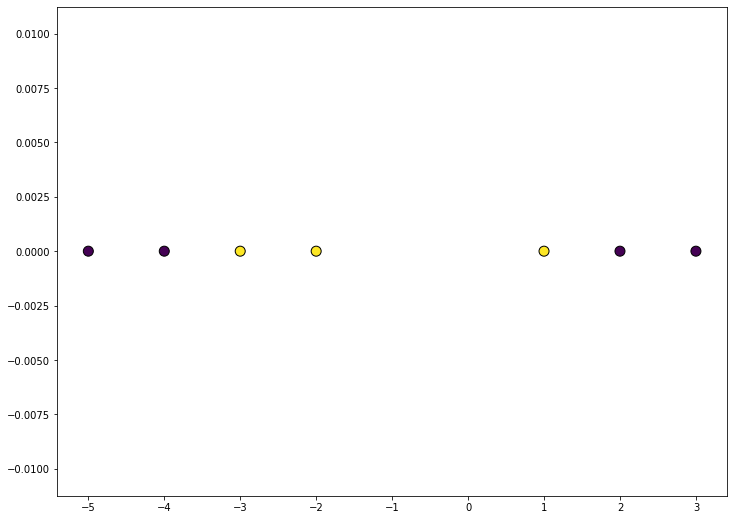

In [8]:
x1 = np.array([-5, -4, -3, -2, 1, 2, 3])
y = np.array([-1, -1, 1, 1, 1, -1, -1])
plt.scatter(x1, np.zeros(x1.shape), c=y, edgecolor="k", s=100);

Перейдем в новое пространство, такое, что $\psi(\vec{x}) = (\vec{x}, \vec{x}^2)$

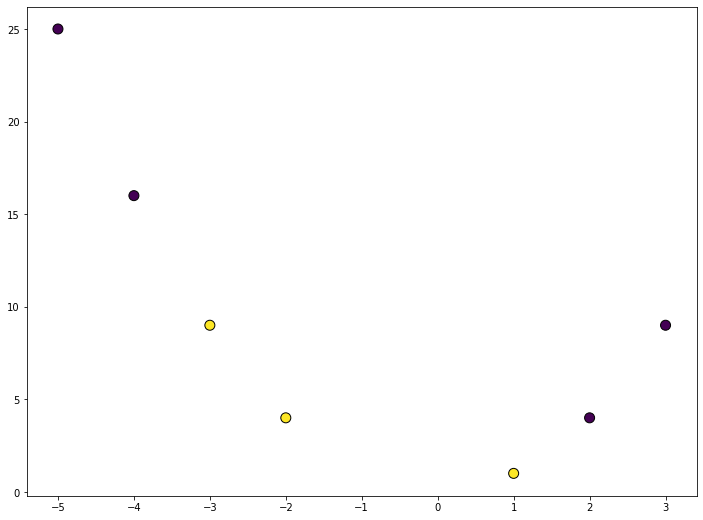

In [9]:
x2 = x1 * x1
plt.scatter(x1, x2, c=y, edgecolor="k", s=100);

**Ядро** - это функция $K: \mathrm{X} \times \mathrm{X} \to R$, которая может быть представима в виде $K(x, x') = \langle \psi(\vec{x}), \psi(\vec{x}') \rangle$ при некотором отображении $\psi: \mathrm{X} \to H$, где $H$ - пространство, в котором определено скалярное произведение.

Функция $K(\vec{x}, \vec{x}')$ называется ядром, если
1. Она симметрична: $K(\vec{x}, \vec{x}') = K(\vec{x}', \vec{x})$
2. Положительно определена: $\int \int K(\vec{x}, \vec{x}') g(\vec{x}) g(\vec{x}') d\vec{x} d\vec{x}'$

## Kernel Trick

Постановка задачи SVM и сам алгоритм классификации зависят только от скалярного произведения объектов, что позволяет нам формально заменить скалярное произведение некой ядерной функцией $K(\vec{x}, \vec{x}')$.

Данная идея позволяет вместо поиска спрямляющего пространства, искать необходимое ядро.

## Способы построения ядер

1. Любое скалярное произведение является ядром: $K(\vec{x}, \vec{x}') = \langle \vec{x}, \vec{x}'\rangle$
2. Константа является ядром: $K(\vec{x}, \vec{x}') = 1$
3. Произведение ядер - ядро: $K(\vec{x}, \vec{x}') = K_1(\vec{x}, \vec{x}') K_2(\vec{x}, \vec{x}')$
4. Произведение отображений - ядро: $K(\vec{x}, \vec{x}') = \phi_1(\vec{x})\phi_2(\vec{x}'), \forall \phi: \mathrm{X} \to \mathbb{R}$
5. Линейная комбинация ядер - ядро: $K(\vec{x}, \vec{x}') = \sum_k \alpha_k K_k(\vec{x}, \vec{x}'), \forall \alpha_k \ge 0$

6. Композиция ядра и отображения - ядро: $K(\vec{x}, \vec{x}') = K_0(\phi(\vec{x}), \phi(\vec{x}'))$
7. Интегральное скалярное произведение: $\int S(\vec{x}, \vec{z}) S(\vec{x}', \vec{z}) dz$, для любой симмтрично интегрируемой функции
8. Функция вида $K(\vec{x}, \vec{x}') = k(\vec{x} - \vec{x}')$ является ядром, если Фурье-образ $F[k](\omega) = (2\pi)^{n/2} \int e^{-i\langle \vec{\omega}, \vec{x} \rangle} k(\vec{x}) d\vec{x}$ не отрицателен.
9. Степенной ряд по $K$ с неотрицательными коэффициентами также ядро (например  $e^{-z}$).
10. и т.д.

## Примеры ядер

Рассмотрим простейшее ядро 

$$ 
   K(\vec{u}, \vec{v}) = \langle \vec{u}, \vec{v} \rangle ^2
$$

где

$$ 
   \vec{u} = (u_1, u_2)^T,\\
   \vec{v} = (v_1, v_2)^T,\\
$$

$$ 
   K(\vec{u}, \vec{v}) = \langle \vec{u}, \vec{v} \rangle ^2 = 
   \\
   = (u_1  v_1 +  u_2 v_2)^2 = u_1^2 v_1^2 + 2u_1 u_2 v_1 v_2 + u_2^2 v_2^2 = 
   \\
   = \left\langle
       (u_1^2, u_2^2, \sqrt{2}u_1 u_2)^T, (v_1^2, v_2^2, \sqrt{2}v_1 v_2)^T
   \right\rangle
$$

То есть наше ядро представимо в виде скалярного произведения в пространстве $H = \mathbb{R}^3$ с преобразованием $\psi: (u_1, u_2)^T \mapsto (u_1^2, u_2^2, \sqrt{2} u_1 u_2)^T$. При этом гиперповерхности в $H$ соответсвует квадратичная поверхность в $X$.

Более сложный пример (полиномиальное ядро)

$$ 
   K(\vec{u}, \vec{v}) = \left(
       \langle \vec{u}, \vec{v} \rangle + 1
   \right)^d
$$

Радиальная базисная функция (radial basis function, RBF)

$$
K(\vec{u}, \vec{v}) = \exp\left(
-\gamma \| \vec{u} - \vec{v} \|^2
\right) \\
\gamma > 0
$$

## Почитать

* __[Support Vector Machines: A Simple Tutorial](https://svmtutorial.online/download.php?file=SVM_tutorial.pdf)__
* К. В. Воронцов, __[Метод опорных векторов](http://www.machinelearning.ru/wiki/images/a/a0/Voron-ML-Lin-SVM.pdf)__
* Kevin P. Murphy __[Machine Learning_ A Probabilistic Perspective](https://mitpress.mit.edu/books/machine-learning-1)__

## Плюсы SVM

* как задача оптимизации - имеет одно единственное решение (если $K$ - ядро)
* эффективная, уверенная классификация при правильном выборе ядра
* позволяет строить довольно сложные разделяющие поверхности
* может работать с довольно большими выборками

## Минусы SVM

* не устойчив по отношению к шуму (выбросы по возможности необходимо убирать)
* нет общих методов построения спрямляющих пространств и ядер
* если нет полной линейной разделимости, необходимо подбирать параметр $C$

## sklearn

В sklearn данный подход реализован для задач 
* классификации: **SVC**, __LinearSVC__
* регрессии: **SVR**, __LinearSVR__

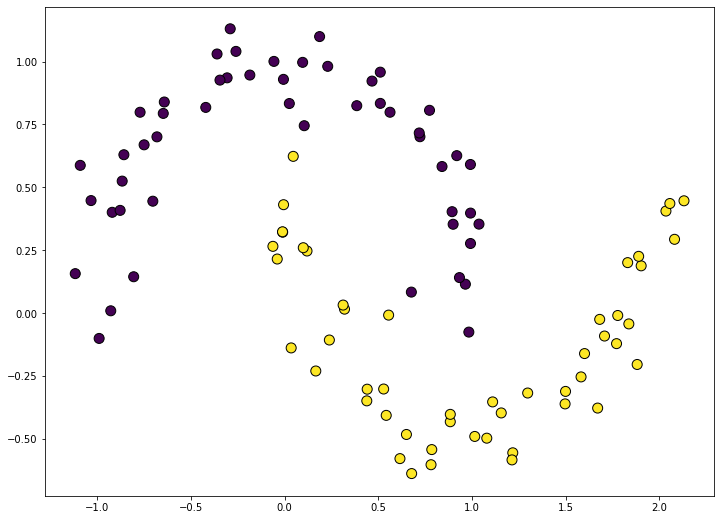

In [8]:
from sklearn.datasets import make_moons

X, Y = make_moons(100, noise=0.1, random_state=13)
Y = 2*Y - 1
plt.scatter(X[:,0], X[:,1], c=Y, edgecolor="k", s=100);

In [9]:
def plot(clf, X, Y):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    dx = (x_max - x_min) * 0.1
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    dy = (y_max - y_min) * 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min - dx, x_max + dx, 100),
                        np.linspace(y_min - dy, y_max + dy, 100))
    
    Z = clf.predict(np.stack([xx.ravel(), yy.ravel()], axis=1))
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z, cmap="Wistia")
    plt.scatter(X[:, 0], X[:, 1], s=100, c=Y, 
                cmap="Wistia", edgecolors='k')    
    plt.show()

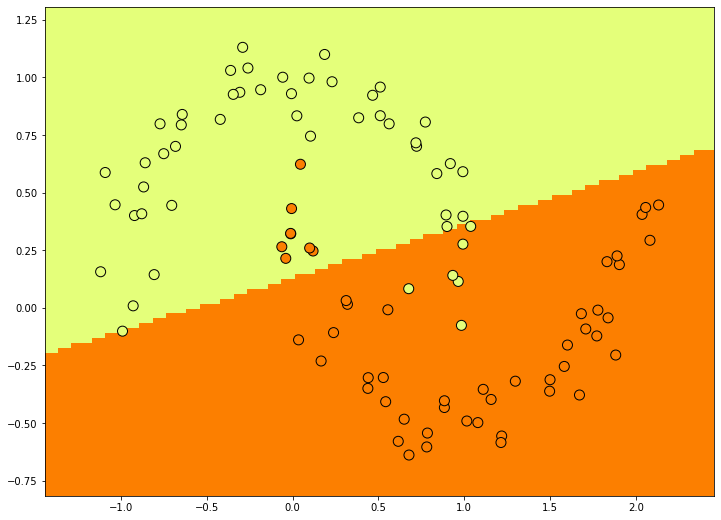

In [10]:
from sklearn.svm import SVC

clf = SVC(C=100, kernel='linear').fit(X, Y)
plot(clf, X, Y)

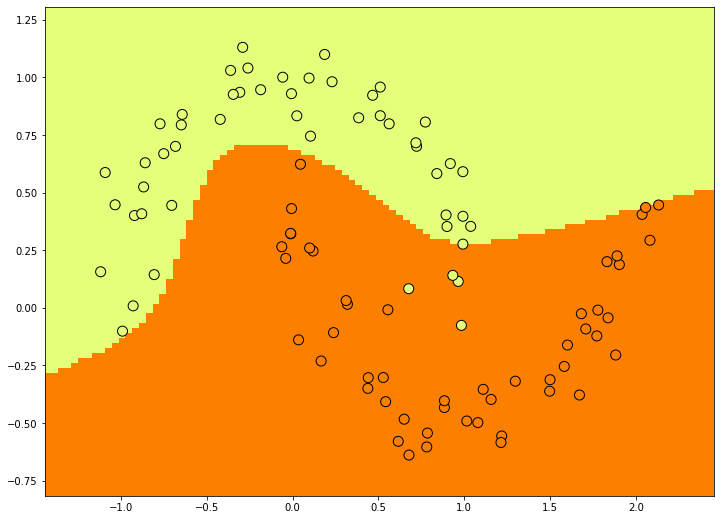

In [11]:
clf = SVC(C=100, kernel='poly', degree=5).fit(X, Y)
plot(clf, X, Y)

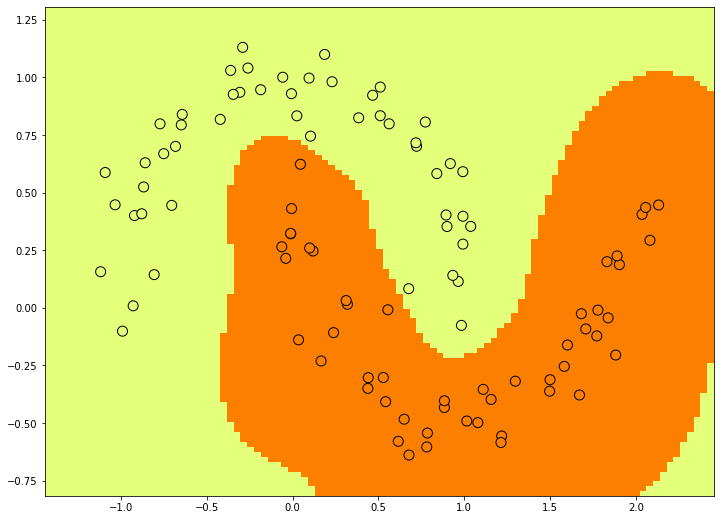

In [12]:
clf = SVC(C=100, kernel='rbf', gamma=10).fit(X, Y)
plot(clf, X, Y)

## Линейный дискриминант

Пусть у нас есть набор признаков $\mathrm{X}$ с известным набором классов $\mathrm{Y}$. Для простоты будем считать, что у нас только два класса: 0 и 1.

Сделаем очень сильное предположение. Пусть вероятности $P(\vec{x}|y=0)$ и $P(\vec{x}|y=1)$ распределены по нормальному закону с некими параметрами $(\vec{\mu}_0, \Sigma_0)$ и $(\vec{\mu}_1, \Sigma_1)$.

Таким образом, мы можем отнести это к классу 1, если 

$$
\ln \left( \frac{P(\vec{x}|y=1)}{P(\vec{x}|y=0)} \right)> T
$$

$$
- (\vec{x} - \vec{\mu}_1)^T \Sigma_1^{-1} (\vec{x} - \vec{\mu}_1) 
- \ln |\Sigma_1| 
+ (\vec{x} - \vec{\mu}_0)^T \Sigma_0^{-1} (\vec{x} - \vec{\mu}_0) 
+ \ln |\Sigma_0| 
> T
$$

Мы получили классификатор, который называют *квадратичным дискриминантом*.

Сделаем ещё одно крайне сильное заявление. Пусть ковариации классов идентичны ($\Sigma_1 = \Sigma_0$).

$$
\ln |\Sigma_0| = \ln |\Sigma_1|
\\
\vec{x}^T \Sigma_0^{-1} \vec{x} = \vec{x}^T \Sigma_1^{-1} \vec{x}
\\
\vec{x}^T \Sigma_i^{-1} \vec{\mu}_i = \vec{\mu}^T_i \Sigma_i^{-1} \vec{x}
$$

$$
(\vec{\mu_1} - \vec{\mu}_0)^T \Sigma^{-1} \vec{x} 
> 
\frac{1}{2} \left(T - \vec{\mu}_0^T \Sigma^{-1} \vec{\mu}_0 + \vec{\mu}_1^T \Sigma^{-1} \vec{\mu}_1\right)
$$


Такой классификатор и называют линейным дискриминантом

# Метод главных компонент (Principal component analysis)

Порой у нас может быть довольно много признаков, при этом какие-то признаки зависят от других признаков, что, следовательно, делает их лишними и не информативными. Хотелось бы найти такое преобразование признаков, чтобы в новом пространстве они были независимы, а каждый новый признак отражал наибольшее количество информации.

Попробуем этого добиться следующим образом: построим гиперплоскость таким образом, чтобы дисперсия расстояний до этой гиперплоскости была максимальна. 

<center>
<img src="https://upload.wikimedia.org/wikipedia/ru/4/4a/FirstPrincipalComponent.jpg">
    </center>

В качестве нулевого шага, выравняем наши признаки, вычтя из них среднее значение. Это нам даст новые признаки, у которых среднее значение даст 0. 

После этого первую главную компоненту определить достаточно просто

$$
S^2 = \frac{1}{N} \sum_n \langle \vec{\omega}_1, \vec{x}_n \rangle^2 = \frac{1}{N} \vec{\omega}_1^T \mathbf{X}^T \mathbf{X} \vec{\omega}_1 \to \max_{\vec{\omega}_1}
$$

Добавим при этом требование ортонормированости вектора нормали

$$
\langle \vec{\omega}_1, \vec{\omega}_1 \rangle = 1
$$

Само решение ищется с помощью множителей Лагранжа

$$
L = \vec{\omega}_1^T \mathbf{X}^T \mathbf{X} \vec{\omega}_1 - \lambda \vec{\omega}^T \vec{\omega}
\\
\frac{\partial L}{\partial \vec{\omega}_1} 
= 2 \mathbf{X}^T \mathbf{X} \vec{\omega}_1 - 2 \lambda \vec{\omega}_1
\\
\mathbf{X}^T \mathbf{X} \vec{\omega}_1 = \lambda \vec{\omega}_1
$$

Для тех, кто знаком с линейной алгеброй, может увидеть здесь, что $\lambda$ должно быть собственным значением матрицы $\mathbf{X}^T \mathbf{X}$, а $\vec{\omega}_1$ одним из собственных векторой этой матрицы.

Посмотрим на дисперсию

$$
S^2 = \frac{1}{N} \vec{\omega}_1^T \mathbf{X}^T \mathbf{X} \vec{\omega}_1 = \frac{1}{N}  \vec{\omega}_1^T \lambda \vec{\omega}_1 = \frac{\lambda}{N} 
$$

То есть максимум нашей дисперсии равен максимальному из возможных собственных значений.

Отлично, мы нашли плоскость, которая определяет первую компоненту. Таким образом, первая компонента будет:

$$
c^{1}_n = \langle \vec{\omega}_1, \vec{x}_n \rangle = \vec{x}_n^T \vec{\omega}_1
$$

Или в старых координатах
$$
\vec{x}^1_n = \langle  \vec{\omega}_1, \vec{x}_n \rangle  \vec{\omega}_1 = c^{1}_n \vec{\omega}_1
$$

Как искать остальные? 

Дальше мы будет искать следующую гиперплоскость, но такую, чтобы она была ортогональная первой. Это будет эквивалентно тому, что мы спроецируем все точки пространства на нашу первую гиперплоскость и в рамках координат этой гиперплоскости будем искать новую гиперплоскость размерностью на 1 меньше.

Формульно, мы вычитаем из наших точек наши "координаты" (проецируем)

$$
\hat{x}^{(2)}_n = \vec{x} - \langle  \vec{\omega}_1, \vec{x}_n\rangle \vec{\omega}_1 
\\
\hat{\mathbf{X}}_2 = \mathbf{X} - \mathbf{X} \vec{\omega}_1 \vec{\omega}_1^T
$$


Затем среди этих точек ищем новую гиперповерхность, что максимизирует дисперсию

$$
\frac{1}{N} \sum_n \langle \hat{x}^2_n, \vec{\omega}_2 \rangle = \frac{1}{N} \vec{\omega}_2^T \hat{\mathbf{X}}^T_2 \hat{\mathbf{X}}_2 \vec{\omega}_1
$$

Здесь также нужно добавить условие ортонормированности, дополнительно мы потребуем ортогональность предыдущему вектору

$$
\langle \vec{\omega}_2, \vec{\omega}_2 \rangle = 1
\\
\langle \vec{\omega}_1, \vec{\omega}_2 \rangle = 0
$$

Тут мы должны присмотреться к $\hat{\mathbf{X}}_2 \vec{\omega}_2$ и дополнительно воспользоваться условием ортогональности

$$
\hat{\mathbf{X}}_2 \vec{\omega}_2 = \mathbf{X} \vec{\omega}_2 - \mathbf{X} \vec{\omega}_1 \vec{\omega}_1^T \vec{\omega}_2 = \mathbf{X} \vec{\omega}_2
$$

Что приводит нас к тому же ответу

$$
\mathbf{X}^T \mathbf{X} \vec{\omega}_2 = \lambda \vec{\omega}_2
$$

Максимум мы получим тогда, когда $\vec{\omega}_2$ является собственным вектором. При этом, максимальное собственное значение мы взять не можем, оно запрещено условием ортогональности. Значим берем второе по величине.

Можно проделать ту же операцию и для третьей компоненты, мы получим тот же результат. Таким образом, вектора нормалей определяющих гиперплоскости для главных компонент являются собственными векторами матрицы $\mathbf{X}^T \mathbf{X}$.

## Сингулярное разложение

Сингулярным разложением любой прямоугольной матрицы $\mathbf{X}$ называют

$$
\mathbf{X} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T
$$

где $\mathbf{U}$ - унитарная матрица собственных векторов для $\mathbf{X} \mathbf{X}^T$; $\mathbf{V}$ - это унитарная матрица собственных векторов для $\mathbf{X}^T \mathbf{X}$; 

* $\mathbf{U}$ - унитарная матрица, состоящая из левых сингулярных векторов, которые являются собственными векторами матрицы $\mathbf{X} \mathbf{X}^T$;
* $\mathbf{V}$ - унитарная матрица, состоящая из правых сингулярных векторов, которые являются собственными векторами матрицы $\mathbf{X}^T \mathbf{X}$, в нашем случае - это именно те вектора нормалей, которые мы искали ранее;
* $\mathbf{\Sigma}$ - матрица, у которой только диагональные элементы не равны нулю и отсортированы, эти числа называют сингулярными.

Отсюда

$$
\mathbf{X}^T \mathbf{X} = \mathbf{V} \mathbf{\Sigma}^T \mathbf{U}^T  \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T 
= \mathbf{V} \mathbf{\Sigma}^2 \mathbf{V}^T
$$

Таким образом, сингулярное разложение матрицы $\mathbf{X}$ тесным образом связано с методом главных компоненты. При этом значение координат в главных компонентах

$$
\mathbf{T} = \mathbf{X} \mathbf{V} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T \mathbf{V} = \mathbf{U} \mathbf{\Sigma}
$$

## Уменьшение размерности

Метод главных компонент можно использовать для уменьшения размерности. Согласно основной идее метода, наши компоненты отсортированы по мере важности, при чем степень важности определяется размером собственного значения. Следовательно, мы можем попробовать отобрать только $L$ самых важных компонент, обрезав $\mathbf{V}$, $\mathbf{\Sigma}$, $\mathbf{U}$ до нужной размерности.

$$
\mathbf{T}_L = \mathbf{U}_L \mathbf{\Sigma}_L
$$

Также, нам ничего не мешает восстановить приближенное значение $\mathbf{X}_L$ из ограниченного числа главных компонент

$$
\mathbf{X}_L = \mathbf{U}_L \mathbf{\Sigma}_L \mathbf{V}^T_L
$$

В ряде случаев, это позволяет убрать шум и выбросы в данных.

## Sklearn

Уже содержит реализацию метода главных компонент: __PCA__

In [13]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def plot():
    X, y = datasets.load_digits(return_X_y=True)


    pca = make_pipeline(StandardScaler(),
                        PCA(n_components=64, random_state=13))
    #pca = make_pipeline(PCA(n_components=64, random_state=13))
    print(X.shape)

    pca.fit(X, y)
    T = pca.transform(X)
    spectrum = pca.steps[-1][1].singular_values_
    print(spectrum.shape)

    plt.bar([i for i in range(len(spectrum))], spectrum)
    plt.show()

(1797, 64)
(64,)


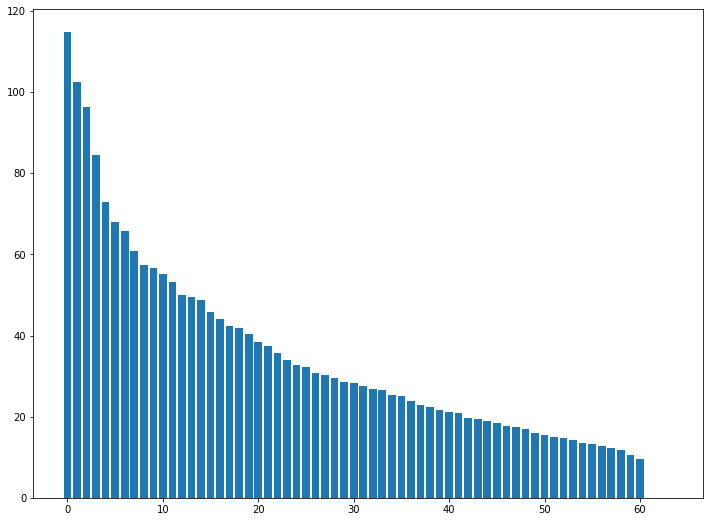

In [15]:
plot()

In [16]:
def plot():
    pca = make_pipeline(StandardScaler(),
                        PCA(n_components=2, random_state=13))
    pca.fit(X, y)
    T = pca.transform(X)
    spectrum = pca.steps[-1][1].singular_values_
    print(spectrum)

    plt.scatter(T[:, 0], T[:, 1], c=y)
    plt.show()

[114.85302698 102.37451344]


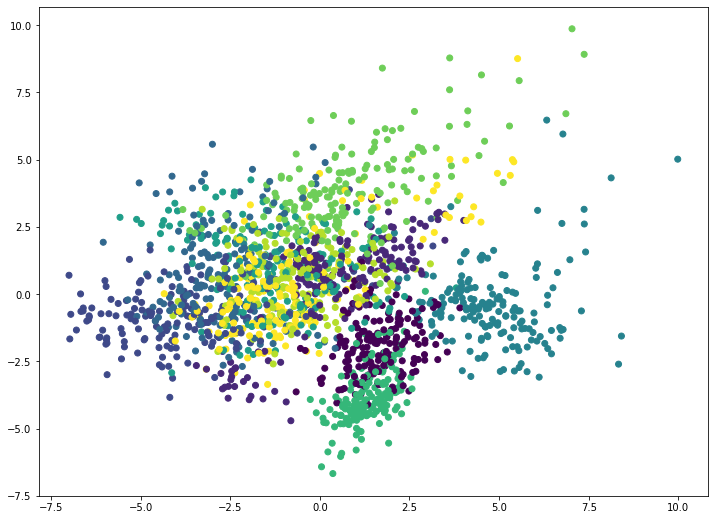

In [17]:
plot()